In [1]:
import csv
import numpy as np 
import random
import time
# sve_ivp
import os
import pandas as pd
import matplotlib.pyplot as plt
from os.path import dirname, realpath, sep, pardir
import sys
plt.rcParams.update({'font.size': 12})
sys.path.append('/blue/pdixit/hodaakl/A5MCMC_IGF_FoxO/Code/')
from UPDATE_LM_FNS import calculate_constraints, update_lambda, openfile

on_mac = False 
on_thinkpad = False 
on_hpg = True

In [2]:
if on_mac == True: 
    data_path = "/Volumes/hodaakl/"
if on_thinkpad== True: 
    data_path = "//exasmb.rc.ufl.edu/blue/pdixit/hodaakl/"
if on_hpg == True: 
    data_path = "/blue/pdixit/hodaakl/"

# specify the project you are working on     
spec_folder = data_path + 'A5MCMC_IGF_FoxO/'

In [3]:


folder_out ='08302022_Ada_allconc_percentile/' #    Lambda = old_lambda.copy() + alpha_arr*(Error)/true_constraints


In [4]:

def Csv_to_Np(index = 0, dat = 'cellpreds' , path = spec_folder + folder_out ): 
    if dat == 'cellpreds':
        fn = path + f'cellpreds_{index}.csv'
    if dat == 'moments':
        fn = path + f'moments_{index}.csv'
    if dat == 'lambdas':
        fn = path + f'Lambdas.csv'
    if dat == 'params': 
        fn = path + f'params_{index}.csv'  
#     if dat == 'variance': 
        
        
#     fn = path + f'variance_{index}.csv'
    
    df = pd.read_csv(fn, sep = ',', header = None) 
    
    table = df.to_numpy()
    return table
    

In [5]:
path = spec_folder + folder_out
err_fn = path +  'Errors.csv'

acc_fn = path + 'AccRatio.csv'
lambda_fn = path + 'Lambdas.csv'
df = pd.read_csv(err_fn, sep = ',', header = None , ) 
err_np = df.to_numpy()
df_l = pd.read_csv(lambda_fn, sep = ',', header = None)
lambda_np = df_l.to_numpy()




In [6]:
print(lambda_np.shape)

(111, 378)


(110, 378)


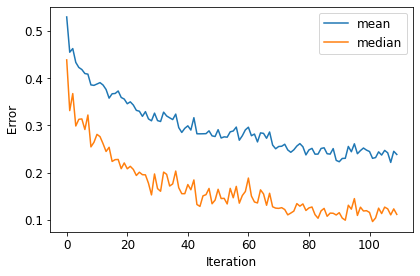

saved figure


In [7]:
path = spec_folder + folder_out
err_fn = path +  'Errors.csv'
df = pd.read_csv(err_fn, sep = ',', header = None , ) 
err_np = df.to_numpy()
print(err_np.shape)
nCons = err_np.shape[1]
real_cons = .1* np.ones(nCons)
rc_m= np.tile(real_cons[:len(err_np[0,:])] , [err_np.shape[0],1])
#print(rc_m.shape)
mean_err = np.mean(abs(err_np), axis = 1)
# mean_err.shape
real_abs = abs(err_np/rc_m)
mean_rel_abs = np.mean(real_abs, axis = 1)
# mean_err = np.mean(abs(err_np), axis = 1)
pathout = '/home/hodaakl/blue_pdixit/hodaakl/Figures/MaxEnt_0830'

plt.plot(range(len(mean_rel_abs) ), mean_rel_abs, label = 'mean')
median_rel_abs = np.median(real_abs, axis = 1)
# mean_err = np.mean(abs(err_np), axis = 1)
plt.plot(range(len(median_rel_abs) ), median_rel_abs, label = 'median')
plt.ylabel(' Error ')
plt.xlabel('Iteration')
plt.legend()
plt.tight_layout()
plt.show()
# plt.savefig(pathout+'/Error.pdf')
print('saved figure')
# plt.clf()

109
(6721, 14)
(6721, 42)
(6721, 42)


<Figure size 432x288 with 0 Axes>

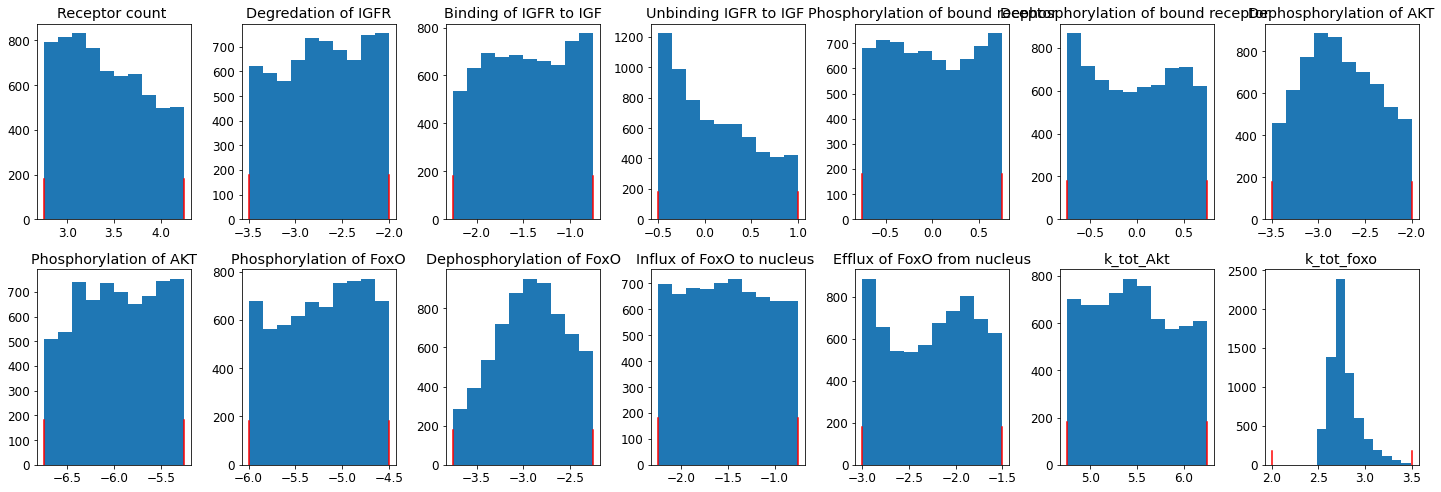

In [8]:
last_iteration= len(mean_rel_abs)-1
print(last_iteration)
data = Csv_to_Np(index = last_iteration, path = path)
NumPars = 14 # number of parameters in this system
par_data = data[:,-NumPars:]

var_data = data[:,-NumPars-int(nCons/9):-NumPars]
mu_data = data[:,-NumPars-int(nCons/9)-int(nCons/9):-NumPars-int(nCons/9)]

# #### 
print(par_data.shape)
print(var_data.shape)
print(mu_data.shape)
### PLOTTING FOR THE PARAMETERS 
# mod = .25
par_dict = {'par_name': ['k1', 'k2','k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'k11', 'k12', 'k_tot_Akt', 'k_tot_foxo']
            , 'low_lim_log':np.array([2.75,-3.5,-2.25,-0.5,-0.75,-0.75,-3.5,-6.75,-6,-3.75,-2.25,-3,4.25+.5,2])
            , 'high_lim_log': np.array([4.25,-2,-0.75,1,0.75,0.75,-2,-5.25,-4.5,-2.25,-0.75,-1.5,5.75+.5,3.5])
            , 'identifier': ['Receptor count ', 'Degredation of IGFR','Binding of IGFR to IGF','Unbinding IGFR to IGF ',
                      'Phosphorylation of bound receptor',  'Dephosphorylation of bound receptor ', 'Dephosphorylation of AKT',
                         'Phosphorylation of AKT', 'Phosphorylation of FoxO', 'Dephosphorylation of FoxO', 'Influx of FoxO to nucleus ',
                         'Efflux of FoxO from nucleus', 'k_tot_Akt', 'k_tot_foxo']}

# param_np = Csv_to_Np(index = 15, dat = 'params')
plt.clf()
plt.rcParams.update({'font.size': 12})
# fig, ax = plt.subplots()
pv = par_data[0,:]
ns, nk = par_data.shape
fig, axs = plt.subplots(2,7, figsize = (20,7))
pi = 0; pj = 0
for i in range(nk):
    axs[pi, pj].hist(par_data[:,i])
    axs[pi, pj].set_title(par_dict['identifier'][i])
    ll = par_dict['low_lim_log'][i]
    lh = par_dict['high_lim_log'][i]
    x_ll = np.ones(10)*ll
    x_lh = np.ones(10)*lh
    # p = np.ones(10)*pv[i]
    y = np.arange(0,200,200/10)
    axs[pi, pj].plot(x_ll, y, c = 'r')
    axs[pi, pj].plot(x_lh, y, c = 'r')
    # axs[pi, pj].plot(p, y, c = 'r')
    
    
    
#     axs[pi, pj].set_xlim([par_dict['low_lim_log'][i],  par_dict['high_lim_log'][i] ])
    pj+= 1
    if pj ==7:
        pj =0 
        pi +=1
    
plt.tight_layout()
pathout = '/home/hodaakl/blue_pdixit/hodaakl/Figures/MaxEnt_0830'

plt.savefig(pathout+'/parameters.pdf')
plt.show()

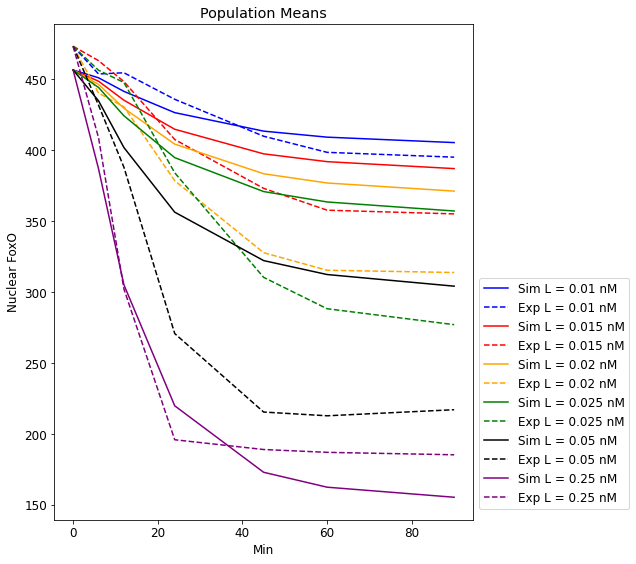

In [9]:
MuVar_d = np.load(spec_folder + 'Arrays_for_max_ent/MuVar_dict_allconc.npy', allow_pickle=True).item()
# print(MuVar_d)
Mu_Pop = np.mean( mu_data , axis = 0)
# print(Mu_Pop.shape)
fig, axis = plt.subplots(figsize = (9,8))
times_arr = np.array([ 0,  6, 12, 24, 45, 60, 90])*60 #make it in seconds 
L  = np.array([10,15,20,25,50,250])*10**-3 #make it in nM
nT = len(times_arr)
nL = len(L)
nConds = int(nT*nL)
c = ['b','r','orange','g','k','purple', 'yellow', 'pink']
# means_sim_conc = np.array([])
i=0
for li in range(nL):
    plt.plot(times_arr/60, Mu_Pop[i:i+nT], label = f'Sim L = {L[li]} nM', c=c[li])
    plt.plot(times_arr/60, MuVar_d['mu'][i:i+nT], '--', label = f'Exp L = {L[li]} nM', c=c[li])
    
    
    i+=nT

plt.title('Population Means')
plt.xlabel('Min')
plt.ylabel('Nuclear FoxO')
plt.legend(bbox_to_anchor = [1,.5])
plt.tight_layout()

In [29]:
# latest_iteration =
latest_iteration = lambda_np.shape[0]-2
moments_np = Csv_to_Np(index = latest_iteration, dat = 'cellpreds', path = path)# , path = spec_folder + '1104_output_Mu/' )
moments_np.shape
latest_iteration


156

In [30]:
moments_np.shape

(19996, 252)

In [31]:
latest_iteration

156

In [32]:
## load mu 
mu_fn = path + f'mu_{latest_iteration}.csv'

df = pd.read_csv(mu_fn, sep = ',', header = None) 

mudat = df.to_numpy()

mudat.shape

(19996, 28)

In [33]:
np.max(mudat, axis =1)

array([534.13391972, 455.36150528, 399.63262798, ..., 478.96709536,
       479.00948161, 530.88817243])

In [34]:
np.min(mudat, axis =1)

array([165.22317975, 229.0784122 , 274.00700736, ..., 368.14370992,
       218.2918685 , 229.14948952])

In [35]:
### load the bounds 

minfbound = np.load(spec_folder + 'Arrays_for_max_ent/MinFoxOBound.npy')

In [36]:
maxfbound = np.load(spec_folder + 'Arrays_for_max_ent/MaxFoxOBound.npy')

In [26]:
ax =0
# preds_perc = np.mean(mu_data, axis = ax)
# preds_perc.shape
preds_perc_2 = data[:,:42*9]
preds_perc.shape
preds_perc = np.mean(preds_perc_2, axis = ax)


In [27]:
print(preds_perc_2.shape)
print(42*9+42+42+14)

(6721, 378)
476


Text(0, 0.5, 'val')

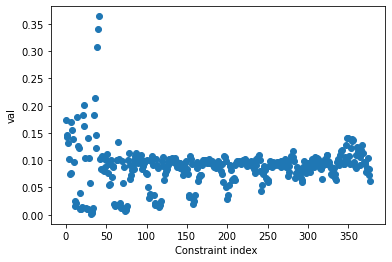

In [28]:
plt.scatter( np.arange(preds_perc.shape[0]) , preds_perc)
# plt.ylim([0,.2])
plt.xlabel('Constraint index ')
plt.ylabel(r'val')

In [10]:
### Plot the lagrange multipliers
times_arr = np.array([ 0,  6, 12, 24, 45, 60, 90])*60 #make it in seconds 
L  = np.array([10,15,20,25,50,250])*10**-3 #make it in nM
nConds = int(len(times_arr)*len(L))
nBins = 9 

title_list = []
for i in range(len(L)):
    for j in range(len(times_arr)):
        title_list.append(f'L={L[i]*100}pM, t={times_arr[j]/60}Min')

In [11]:
latest_iteration = err_np.shape[0]-1
print(latest_iteration)

109


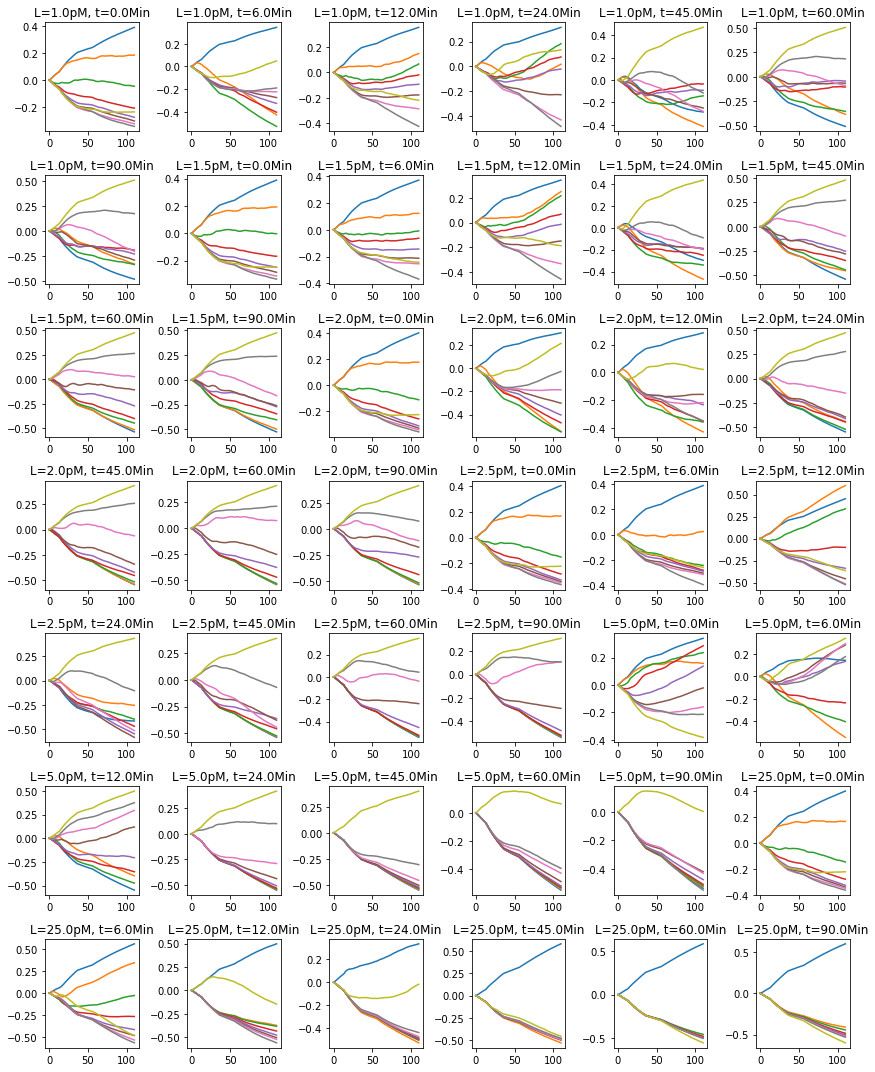

In [12]:

##### 
plt.rcParams.update({'font.size': 10})
n_iter, nTotCons = lambda_np.shape
start_iter = 0

#### 
# I want to visualize the lagrange multipliers 
lambda_np_resh = np.reshape(lambda_np,(n_iter, nBins, nConds))
# each plot will have 1 condition with all its bins 
# number of plots = nConds*nBins 
nR = len(times_arr)# number of rows 
nC = len(L)# number of columns
ri =0; rc = 0; 
fig, axs = plt.subplots(nR,nC, figsize = (12,15))
i=0

for i in range(nConds):
    y = lambda_np_resh[start_iter:,:,i]
    x = np.arange(latest_iteration+2)
    axs[ri,rc].plot(x,y)
    tit = title_list[i]
    axs[ri,rc].set_title(tit)
    rc+=1 
    if rc==nC:
        rc=0
        ri+=1 


plt.tight_layout()

In [13]:
np.max(err_np)

0.3138316320069059

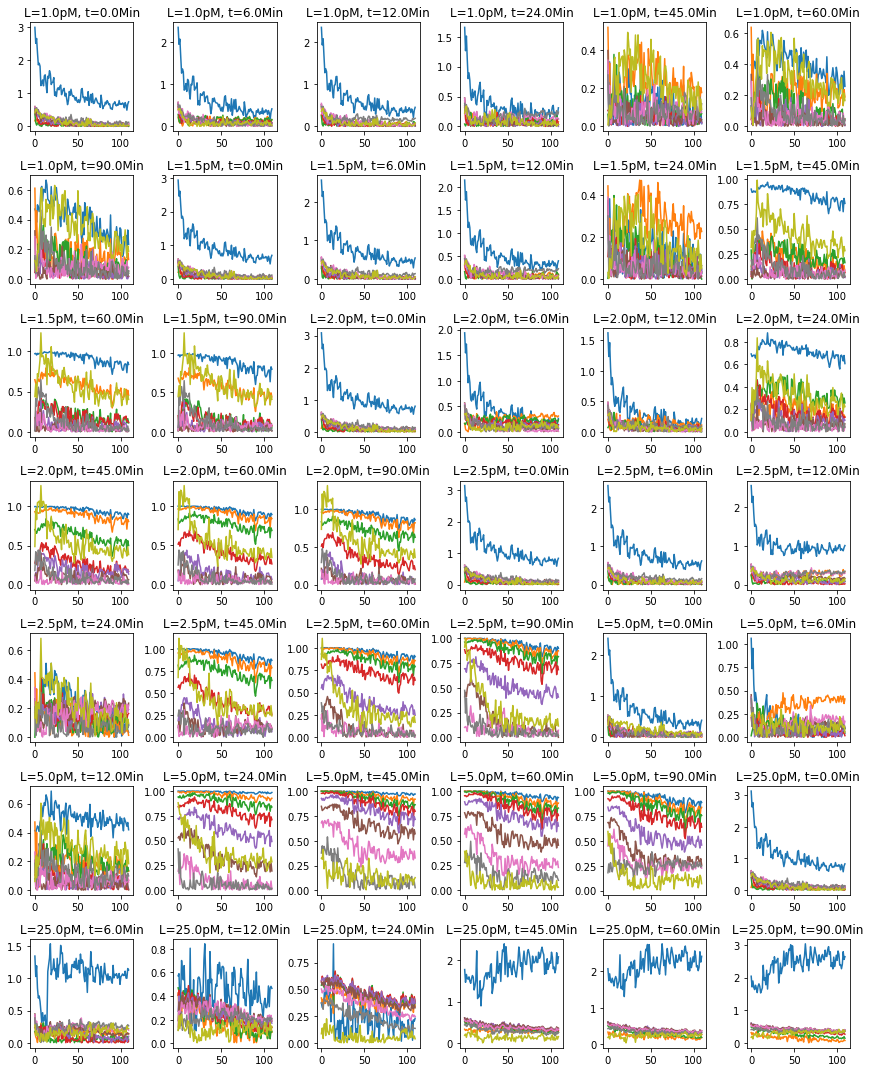

In [14]:

##### 
n_iter, nTotCons = lambda_np.shape
start_iter = 0

#### 
# I want to visualize the lagrange multipliers 
Error_resh = np.reshape(real_abs,(n_iter-1, nBins, nConds))
# each plot will have 1 condition with all its bins 
# number of plots = nConds*nBins 
nR = len(times_arr)# number of rows 
nC = len(L)# number of columns
ri =0; rc = 0; 
fig, axs = plt.subplots(nR,nC, figsize = (12,15))
i=0

for i in range(nConds):
    y =np.absolute( Error_resh[start_iter:,:,i])
    x = np.arange(latest_iteration+1)
    axs[ri,rc].plot(x,y)
    tit = title_list[i]
    axs[ri,rc].set_title(tit)
    rc+=1 
    if rc==nC:
        rc=0
        ri+=1 



plt.tight_layout()

In [24]:
data.shape

(1512, 476)

In [33]:
for i in range(68):
    d = Csv_to_Np(index = i, path = path)
    print(d.shape)

(1157, 476)
(1496, 476)
(1464, 476)
(1348, 476)
(1590, 476)
(1194, 476)
(1242, 476)
(1413, 476)
(1479, 476)
(1519, 476)
(1522, 476)
(1426, 476)
(1531, 476)
(1411, 476)
(1011, 476)
(2133, 476)
(1807, 476)
(1896, 476)
(1936, 476)
(1931, 476)
(1967, 476)
(1891, 476)
(1930, 476)
(1984, 476)
(1971, 476)
(1892, 476)
(1854, 476)
(1987, 476)
(1848, 476)
(1796, 476)
(1851, 476)
(1845, 476)
(1826, 476)
(1800, 476)
(1817, 476)
(1864, 476)
(1453, 476)
(1820, 476)
(1813, 476)
(1780, 476)
(1827, 476)
(1766, 476)
(1658, 476)
(1899, 476)
(1722, 476)
(1650, 476)
(1678, 476)
(1781, 476)
(1970, 476)
(1896, 476)
(1852, 476)
(1754, 476)
(1833, 476)
(1735, 476)
(1834, 476)
(1869, 476)
(1620, 476)
(1939, 476)
(1823, 476)
(1785, 476)
(1829, 476)
(1836, 476)
(1882, 476)
(1693, 476)
(1870, 476)
(1712, 476)
(1512, 476)
(1084, 476)
